In [25]:
# Text Analysis of Movie Taglines (Python)

# Note. Results from this program may differ from those published
#       in the book due differences between Python and R algorithms
#       and approaches to the analysis.

# import packages for text processing and multivariate analysis
import re  # regular expressions
import nltk  # draw on the Python natural language toolkit
import pandas as pd  # DataFrame structure and operations
import numpy as np  # arrays and numerical processing
import scipy
import matplotlib.pyplot as plt  # 2D plotting

# terms-by-documents matrix
from sklearn.feature_extraction.text import CountVectorizer

# alternative distance metrics for multidimensional scaling
from sklearn.metrics import euclidean_distances 
from sklearn.metrics.pairwise import linear_kernel as cosine_distances
from sklearn.metrics.pairwise import manhattan_distances as manhattan_distances

from sklearn import manifold  # multidimensional scaling
from sklearn.cluster import KMeans  # cluster analysis by partitioning
from sklearn.decomposition import PCA  # principal component analysis

In [26]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [27]:
# define list of codes to be dropped from documents
# carriage-returns, line-feeds, tabs
codelist = ['\r', '\n', '\t']    

# contractions and other word strings to drop from further analysis, adding
# to the usual English stopwords to be dropped from the document collection
more_stop_words = ['cant','didnt','doesnt','dont','goes','isnt','hes',\
    'shes','thats','theres','theyre','wont','youll','youre','youve',\
    're','tv','g','us','en','ve','vg','didn','pg','gp','our','we',
    'll','film','video','name','years','days','one','two','three',\
    'four','five','six','seven','eight','nine','ten','eleven','twelve'] 
# start with the initial list and add to it for movie text work 
stoplist = nltk.corpus.stopwords.words('english') + more_stop_words 

# text parsing function for creating text documents 
# there is more we could do for data preparation 
# stemming... looking for contractions... possessives... 
# but we will work with what we have in this parsing function
# if we want to do stemming at a later time, we can use
#     porter = nltk.PorterStemmer()  
# in a construction like this
#     words_stemmed =  [porter.stem(word) for word in initial_words]  
def text_parse(string):
    # replace non-alphanumeric with space 
    temp_string = re.sub('[^a-zA-Z]', '  ', string)    
    # replace codes with space
    for i in range(len(codelist)):
        stopstring = ' ' + codelist[i] + '  '
        temp_string = re.sub(stopstring, '  ', temp_string)      
    # replace single-character words with space
    temp_string = re.sub('\s.\s', ' ', temp_string)   
    # convert uppercase to lowercase
    temp_string = temp_string.lower()    
    # replace selected character strings/stop-words with space
    for i in range(len(stoplist)):
        stopstring = ' ' + str(stoplist[i]) + ' '
        temp_string = re.sub(stopstring, ' ', temp_string)        
    # replace multiple blank characters with one blank character
    temp_string = re.sub('\s+', ' ', temp_string)    
    return(temp_string)    


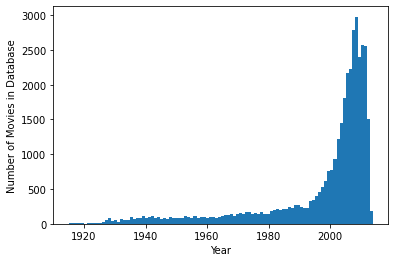

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


<Figure size 432x288 with 0 Axes>

In [28]:
# read in the comma-delimited text file with from initial data
# preparation... create the movies data frame for analysis
movies = pd.read_csv('movie_tagline_data_parsed.csv') 

# plot frequency of movies by year... histogram
plt.figure()
plt.hist(movies['year'], bins= 100)
plt.xlabel('Year')
plt.ylabel('Number of Movies in Database')
plt.show()
plt.savefig('fig_text_movies_by_year_histogram.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='landscape', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [29]:
# we work with movies from 1974 to 2013
# create aggregate tagline_text collection for each year of interest
year = []  # initialize year list
tagline_text = []  # initialize aggregate tagline text
parsed_text = []  # parsed tagline text for subsequent analysis 
aggregate_document = ''  # intialize aggregate taglines document
for iyear in range(1974,2014):
    year.append(iyear)
    gather_taglines = ''  # initialize aggregate tagline text
    this_year_data_frame = movies[movies['year'] == iyear]
    for this_record_index in this_year_data_frame.index.values:
        this_record = this_year_data_frame.loc[this_record_index]
        gather_taglines = gather_taglines + this_record['tagline']    
    tagline_text.append(gather_taglines)
    parsed_text.append(text_parse(gather_taglines))
    aggregate_document = aggregate_document + gather_taglines
big_bag_of_words = text_parse(aggregate_document)
    
# create document collection... 40 years of data = 40 documents
tagline_data = {'year': year, 'tagline_text':tagline_text,\
    'parsed_text':parsed_text}        
tagline_data_frame = pd.DataFrame(tagline_data)
    
# create terms-by-documents matrix from the parsed text
# extracting the top 200 words in the tagline corpus
tdm_method = CountVectorizer(max_features = 200, binary = True)
examine_movies_tdm = tdm_method.fit(parsed_text)
top_words = examine_movies_tdm.get_feature_names()

# get clean printing of the top words 
print('\nTop 200 words in movie taglines database\n')
print(top_words)
print(map(lambda t: t.encode('ascii'), top_words))  # print sans unicode


Top 200 words in movie taglines database

['action', 'adventure', 'alive', 'always', 'america', 'american', 'another', 'anything', 'away', 'back', 'bad', 'battle', 'beautiful', 'become', 'begins', 'best', 'beyond', 'big', 'biggest', 'blood', 'born', 'call', 'came', 'city', 'come', 'comedy', 'comes', 'could', 'crime', 'dangerous', 'dark', 'day', 'dead', 'deadly', 'death', 'destroy', 'die', 'dream', 'dreams', 'earth', 'easy', 'end', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'evil', 'experience', 'eyes', 'family', 'fantasy', 'far', 'fast', 'father', 'fear', 'fight', 'fighting', 'find', 'first', 'forever', 'forget', 'found', 'friends', 'full', 'fun', 'future', 'game', 'get', 'girl', 'girls', 'go', 'going', 'good', 'got', 'great', 'greatest', 'happen', 'hard', 'heart', 'hell', 'hero', 'high', 'home', 'horror', 'hot', 'house', 'human', 'journey', 'justice', 'keep', 'kill', 'killer', 'killing', 'king', 'know', 'last', 'law', 'left', 'legend', 'let', 'life', 'like', 'little

In [30]:
print(tagline_data_frame.head())

   year  ...                                        parsed_text
0  1974  ...   funniest police shows ever funniest police co...
1  1975  ...   mosaiken und fresken als zeugen der geschicht...
2  1976  ...   let poisons lurk mud hatch maryland lottery l...
3  1977  ...   soup rob old tricks get ready match stars may...
4  1978  ...   searching star called earth first win great w...

[5 rows x 3 columns]


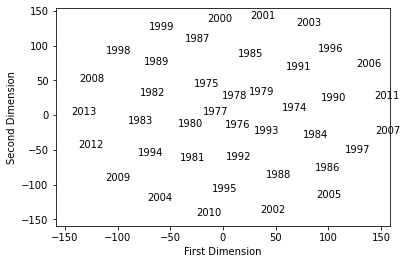

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

In [31]:
# extract the terms-by-documents matrix 
# in scipy compressed sparse column format
sparse_movies_tdm = tdm_method.fit_transform(parsed_text)
# convert sparse matrix into regular terms-by-documents matrix
movies_tdm = sparse_movies_tdm.todense()
# define the documents-by-terms matrix 
movies_dtm = movies_tdm.transpose()
 
# dissimilarity measures and multidimensional scaling
# consider alternative pairwise distance metrics from sklearn modules
# euclidean_distances, cosine_distances, manhattan_distances (city-block)
# note that different metrics provide different solutions
# movies_distance_matrix = euclidean_distances(movies_tdm)
# movies_distance_matrix = manhattan_distances(movies_tdm)
movies_distance_matrix = cosine_distances(movies_tdm)

mds_method = manifold.MDS(n_components = 2, random_state = 9999,\
    dissimilarity = 'precomputed')
mds_fit = mds_method.fit(movies_distance_matrix)  
mds_coordinates = mds_method.fit_transform(movies_distance_matrix) 

# plot tagline text for years in two dimensions 
# defined by multidimensional scaling
plt.figure()
plt.scatter(mds_coordinates[:,0],mds_coordinates[:,1],\
    facecolors = 'none', edgecolors = 'none')  # plots points in white (invisible)
labels = []
for iyear in range(1974,2014):
    labels.append(str(iyear))  
for label, x, y in zip(labels, mds_coordinates[:,0], mds_coordinates[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')    
plt.show()
plt.savefig('fig_text_mds_1974_2013.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='landscape', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [32]:
# classification of words into groups for further analysis
# use transpose of the terms-by-document matrix and cluster analysis
# try five clusters/groups of words
clustering_method = KMeans(n_clusters = 5, random_state = 9999) 
clustering_solution = clustering_method.fit(movies_dtm)
cluster_membership = clustering_method.predict(movies_dtm)
word_distance_to_center = clustering_method.transform(movies_dtm)

In [14]:
movies_dtm

matrix([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 0, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
word_distance_to_center

In [33]:
# top words data frame for reporting k-means clustering results
top_words_data = {'word': top_words, 'cluster': cluster_membership,\
    'dist_to_0': word_distance_to_center[0:,0],\
    'dist_to_1': word_distance_to_center[0:,1],\
    'dist_to_2': word_distance_to_center[0:,2],\
    'dist_to_3': word_distance_to_center[0:,3],\
    'dist_to_4': word_distance_to_center[0:,4]}

In [20]:
top_words_data_frame.head()

,word,cluster,dist_to_0,dist_to_1,dist_to_2,dist_to_3,dist_to_4
0,action,4,1.634502,1.623900,1.477258,1.621141,0.989190
1,adventure,4,1.351090,1.377650,1.264499,1.299502,0.291342
2,alive,1,2.299344,1.825569,2.220876,2.005502,2.173287
3,always,3,2.231432,1.996216,2.163860,1.806782,1.918495
4,america,4,1.586742,1.424203,1.532631,1.583315,0.967442


In [34]:
distance_name_list = ['dist_to_0','dist_to_1','dist_to_2','dist_to_3','dist_to_4']    
top_words_data_frame = pd.DataFrame(top_words_data)
for cluster in range(5):
    words_in_cluster =\
        top_words_data_frame[top_words_data_frame['cluster'] == cluster] 
    sorted_data_frame =\
        top_words_data_frame.sort_values(distance_name_list[cluster],\
        ascending = True)
    print('\n Top Words in Cluster :',cluster,'------------------------------')
    print(sorted_data_frame.head())


 Top Words in Cluster : 0 ------------------------------
       word  cluster  dist_to_0  dist_to_1  dist_to_2  dist_to_3  dist_to_4
82     hero        0   0.908539   1.569439   1.505199   1.602340   1.041576
125    must        0   1.064489   1.727680   1.897092   1.815149   1.630751
162    stop        0   1.231971   1.555526   1.783898   1.856416   1.436525
33   deadly        0   1.292903   1.740217   1.736555   1.823477   1.391382
142   ready        0   1.292903   1.941001   1.918930   2.094200   1.700997

 Top Words in Cluster : 1 ------------------------------
      word  cluster  dist_to_0  dist_to_1  dist_to_2  dist_to_3  dist_to_4
71   girls        4   1.586742   1.329468   1.359764   1.564059   0.967442
192  women        4   1.657866   1.329468   1.586072   1.602340   1.020944
183   want        4   1.586742   1.329468   1.359764   1.564059   0.967442
199  young        4   1.351090   1.377650   1.264499   1.299502   0.291342
32    dead        4   1.351090   1.377650   1.264499 

In [35]:
# could examine possible clustering solutions with partitioning
# by changing the n_clusters setting for KMeans

# a five-cluster solution seems to make sense with words
# toward the center of each cluster fitting together
# let's use pairs of top words from each cluster to name the clusters
# cluster index 0: forever-hero
# cluster index 1: best-high
# cluster index 2: young-comedy
# cluster index 3: everything-family
# cluster index 4: going-real

# name the clusters in the top words data frame
cluster_to_name = {0:'hero-must',\
    1:'girls-women', 2:'best-high',\
    3:'beyond-murder', 4:'young-comedy'}
top_words_data_frame['cluster_name'] = top_words_data_frame['cluster'].map(cluster_to_name)

# use word clusters to define text measures...
# in particular, let the raw score for a cluster for a year be the percentage
# of words in that year's tagline documents that fall within the cluster
# then to examine movies in time, standardize cluster scores across the
# forty years of the study and plot as a multiple time series
hero_must_df =\
    top_words_data_frame[top_words_data_frame['cluster'] == 0]     
hero_must_word_list = str(hero_must_df['word'])  

girls_women_df =\
    top_words_data_frame[top_words_data_frame['cluster'] == 1]     
girls_women_word_list = str(girls_women_df['word'])  

best_high_df =\
    top_words_data_frame[top_words_data_frame['cluster'] == 2]     
best_high_word_list = str(best_high_df['word'])  

beyond_murder_df =\
    top_words_data_frame[top_words_data_frame['cluster'] == 3]     
beyond_murder_word_list = str(beyond_murder_df['word'])  

young_comedy_df =\
    top_words_data_frame[top_words_data_frame['cluster'] == 4]     
young_comedy_word_list = str(young_comedy_df['word'])  

# cluster scores as percentage of total words
def cluster_scoring(cluster_count, total_count):
    return (100 * (cluster_count/total_count))
                                                                    
# initialize word counts    
hero_must_words = []; girls_women_words = []; beyond_murder_words = []; 
young_comedy_words = []; best_high_words = []; total_words = []
# initialize cluster scores
hero_must = []; best_high = []; young_comedy = []; 
beyond_murder = []; girls_women = []
# compute text measures for each year
for iyear in range(len(year)):
    text = parsed_text[iyear]  # this year's text for scoring
    total_count = len([w for w in text.split()])
    total_words.append(total_count)
    
    hero_must_count =\
        len([w for w in text.split() if w in hero_must_word_list])
    hero_must_words.append(hero_must_count)
    hero_must.append(cluster_scoring(hero_must_count, total_count))
    
    best_high_count =\
         len([w for w in text.split() if w in best_high_word_list])
    best_high_words.append(best_high_count)
    best_high.append(cluster_scoring(best_high_count, total_count))
    
    young_comedy_count =\
        len([w for w in text.split() if w in young_comedy_word_list])
    young_comedy_words.append(young_comedy_count)
    young_comedy.append(cluster_scoring(young_comedy_count, total_count))    
        
    beyond_murder_count =\
        len([w for w in text.split() if w in beyond_murder_word_list])
    beyond_murder_words.append(beyond_murder_count)
    beyond_murder.append\
        (cluster_scoring(beyond_murder_count, total_count))    
        
    girls_women_count =\
        len([w for w in text.split() if w in girls_women_word_list])    
    girls_women_words.append(girls_women_count)
    girls_women.append(cluster_scoring(girls_women_count, total_count))   

add_cluster_data = {'total_words':total_words,\
    'hero_must_words':hero_must_words,\
    'hero_must':hero_must,\
    'best_high_words':best_high_words,\
    'best_high':best_high,\
    'young_comedy_words':young_comedy_words,\
    'young_comedy':young_comedy,\
    'beyond_murder_words':beyond_murder_words,\
    'beyond_murder':beyond_murder,\
    'girls_women_words':girls_women_words,\
    'girls_women':girls_women}   
add_cluster_data_frame = pd.DataFrame(add_cluster_data)      
tagline_data_frame =\
    pd.concat([tagline_data_frame,add_cluster_data_frame],axis=1) 

# check text measure calculations
print(tagline_data_frame.describe())
print(tagline_data_frame.head())
print(tagline_data_frame.tail())

              year   total_words  ...  girls_women_words  girls_women
count    40.000000     40.000000  ...          40.000000    40.000000
mean   1993.500000   5063.175000  ...         198.225000     3.854447
std      11.690452   4694.148555  ...         181.861808     0.637090
min    1974.000000   1322.000000  ...          34.000000     1.789474
25%    1983.750000   1789.500000  ...          67.000000     3.588184
50%    1993.500000   2395.000000  ...          94.500000     3.925390
75%    2003.250000   7461.000000  ...         307.250000     4.206054
max    2013.000000  16670.000000  ...         590.000000     4.931578

[8 rows x 12 columns]
   year  ... girls_women
0  1974  ...    4.191981
1  1975  ...    4.183007
2  1976  ...    2.702703
3  1977  ...    3.178123
4  1978  ...    3.286082

[5 rows x 14 columns]
    year  ... girls_women
35  2009  ...    3.539292
36  2010  ...    3.840811
37  2011  ...    3.941237
38  2012  ...    4.074821
39  2013  ...    3.474399

[5 rows x 14 colu

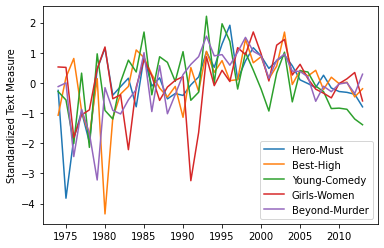

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

In [36]:
# compute text measure standard scores across years 
tagline_data_frame['z_hero_must'] =\
    tagline_data_frame['hero_must'].\
    apply(lambda d: (d - tagline_data_frame['hero_must'].mean())/\
    tagline_data_frame['hero_must'].std())
    
tagline_data_frame['z_best_high'] =\
    tagline_data_frame['best_high'].\
    apply(lambda d: (d - tagline_data_frame['best_high'].mean())/\
    tagline_data_frame['best_high'].std())    
    
tagline_data_frame['z_young_comedy'] =\
    tagline_data_frame['young_comedy'].\
    apply(lambda d: (d - tagline_data_frame['young_comedy'].mean())/\
    tagline_data_frame['young_comedy'].std())    

tagline_data_frame['z_girls_women'] =\
    tagline_data_frame['girls_women'].\
    apply(lambda d: (d - tagline_data_frame['girls_women'].mean())/\
    tagline_data_frame['girls_women'].std())    
        
tagline_data_frame['z_beyond_murder'] =\
    tagline_data_frame['beyond_murder'].\
    apply(lambda d: (d - tagline_data_frame['beyond_murder'].mean())/\
    tagline_data_frame['beyond_murder'].std())            
                
# prepare data frame for multiple time series plot
prelim_mts = pd.DataFrame(tagline_data_frame, columns =\
    ['year', 'z_hero_must', 'z_best_high', 'z_young_comedy',\
    'z_girls_women', 'z_beyond_murder'])
prelim_mts.rename(columns = {'z_hero_must':'Hero-Must',\
    'z_best_high':'Best-High', 'z_young_comedy':'Young-Comedy',\
    'z_girls_women':'Girls-Women',\
    'z_beyond_murder':'Beyond-Murder'}, inplace = True)
mts = prelim_mts.set_index('year')    

# generate the plot  
mts.plot()
plt.xlabel('')
plt.ylabel('Standardized Text Measure')
plt.show()
plt.savefig('fig_text_mts_1974_2013.pdf', 
    bbox_inches = 'tight', dpi=None,  
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [24]:
# Suggestions for the student:
# Try word stemming prior to the definition of a 
# terms-by-documents matrix. Try longer lists of words 
# for the identified clusters. See if there are ways to utilize 
# information from wordnet to guide further analyses.
# Text features within text classification problems may be defined 
# on term document frequency alone or on measures of term
# document frequency adjusted by term corpus frequency.
# Try alternative feature selection and text measures, and
# try alternative cluster analysis methods. See if you can
# use methods of latent semantic analysis to identify
# themes or common topics across the corpus.